#Task 3 : Exploratory Data Analysis on the Global Terrorism Dataset

 In this task, we will do Exploratory Data Analysis on terrorism dataset and find some insightful information out of the dataset.

#Importing the Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Setting juypyter notebook to show a maximum of 5000 rows in output for each cell
pd.options.display.max_rows = 5000 

In [23]:
#Jupyter Notebook will ignore all the warnings
import warnings
warnings.filterwarnings('ignore')    


#Loading the Dataset

In [24]:
terror_data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [25]:
# Looking at first 5 rows of the dataset
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [26]:
# Looking at last 5 rows of the dataset
terror_data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#Getting the Size of the Dataset

In [27]:
print("Number of rows in the Dataset :", terror_data.shape[0])
print("Number of columns in the Dataset :", terror_data.shape[1])

Number of rows in the Dataset : 181691
Number of columns in the Dataset : 135


#All the column names of the dataset

In [28]:
columns = terror_data.columns.tolist()
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

#Renaming Certain Columns

In [29]:
df = pd.DataFrame(terror_data, terror_data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [30]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,Region,State,City,Latitude,Longitude,specificity,vicinity,Location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,Success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#Feature Creation

Here, a new column is added called Total_casualities which represents number of the people harmed (killed + injured) in terrorist attacks.

In [31]:
df['Total_casualities'] = df['Killed'] + df['Wounded']

#Feature Extraction

Here, we extract some of the columns from the dataset and analyze these data to get some useful informaton.

In [32]:
df =  df[['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed', 'Wounded', 'Total_casualities', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'Success']]


In [33]:
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,Location,AttackType,Killed,Wounded,Total_casualities,Target,Summary,Group,Target_type,Weapon_type,Motive,Success
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Assassination,1.0,0.0,1.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,NaN,Assassination,1.0,0.0,1.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,NaN,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


#Checking for Null Values

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Extended           181691 non-null  int64  
 3   Day                181691 non-null  int64  
 4   Country            181691 non-null  object 
 5   State              181270 non-null  object 
 6   Region             181691 non-null  object 
 7   City               181257 non-null  object 
 8   Latitude           177135 non-null  float64
 9   Longitude          177134 non-null  float64
 10  Location           55495 non-null   object 
 11  AttackType         181691 non-null  object 
 12  Killed             171378 non-null  float64
 13  Wounded            165380 non-null  float64
 14  Total_casualities  164817 non-null  float64
 15  Target             181055 non-null  object 
 16  Su

In [35]:
df.isnull().sum()

Year                      0
Month                     0
Extended                  0
Day                       0
Country                   0
State                   421
Region                    0
City                    434
Latitude               4556
Longitude              4557
Location             126196
AttackType                0
Killed                10313
Wounded               16311
Total_casualities     16874
Target                  636
Summary               66129
Group                     0
Target_type               0
Weapon_type               0
Motive               131130
Success                   0
dtype: int64


Here, we see some null values present in the dataset. But, they are not needed to be handled at this point because we are only exploring the data.

#Exploratory Data Analysis and Data Visualization

#Correlation Heatmap for the features

In [37]:
corr  =  df.corr()

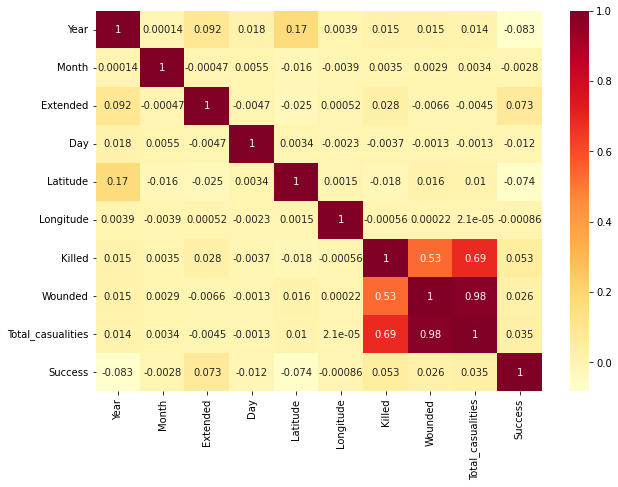

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'YlOrRd')
plt.show()

#Number of Terrorists Activities per Year

Now we will see the visualization between Number of terrorists activities and Year

In [39]:
count =  df['Year'].value_counts()
year = count.index.sort_values(ascending  = True)
val = []
for i in year:
    val.append(count[i])

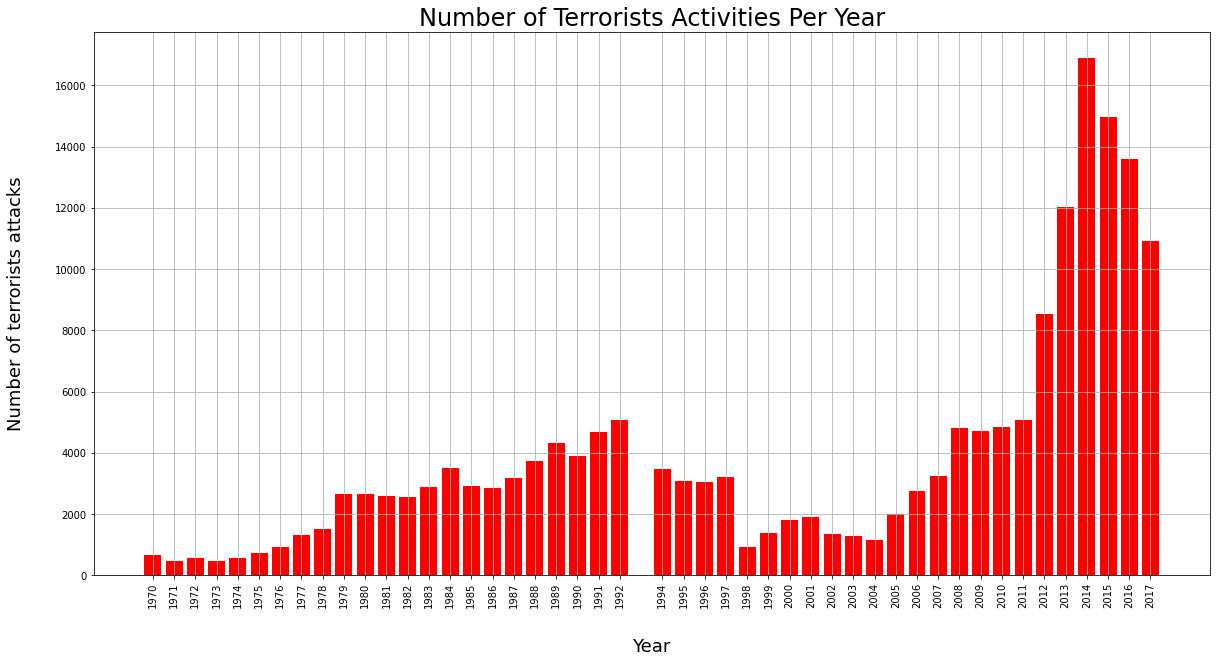

In [40]:
plt.figure(figsize = (20,10))
plt.bar(year, val, tick_label = year, color = 'red')
plt.xticks(rotation  = 90)
plt.title('Number of Terrorists Activities Per Year', fontsize=24)  
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Number of terrorists attacks', fontsize = 18, labelpad = 30)
plt.grid(True)
plt.show()

#outcome:

Here usually, as the Time proceeds the Number of Terrorists Attacks also Increased.
The peak in terms of Number of Terrorists Attacks was observed in 2014.
A Decline in terms of Number of Terrorists Attacks has been observed since 2015 which shows the progress towards the mission of reducing such terrorists attacks.


#Total Casualties Per Year

In [41]:
Cas_Year  = df.groupby(by = df['Year']).Total_casualities.sum().to_frame().reset_index()

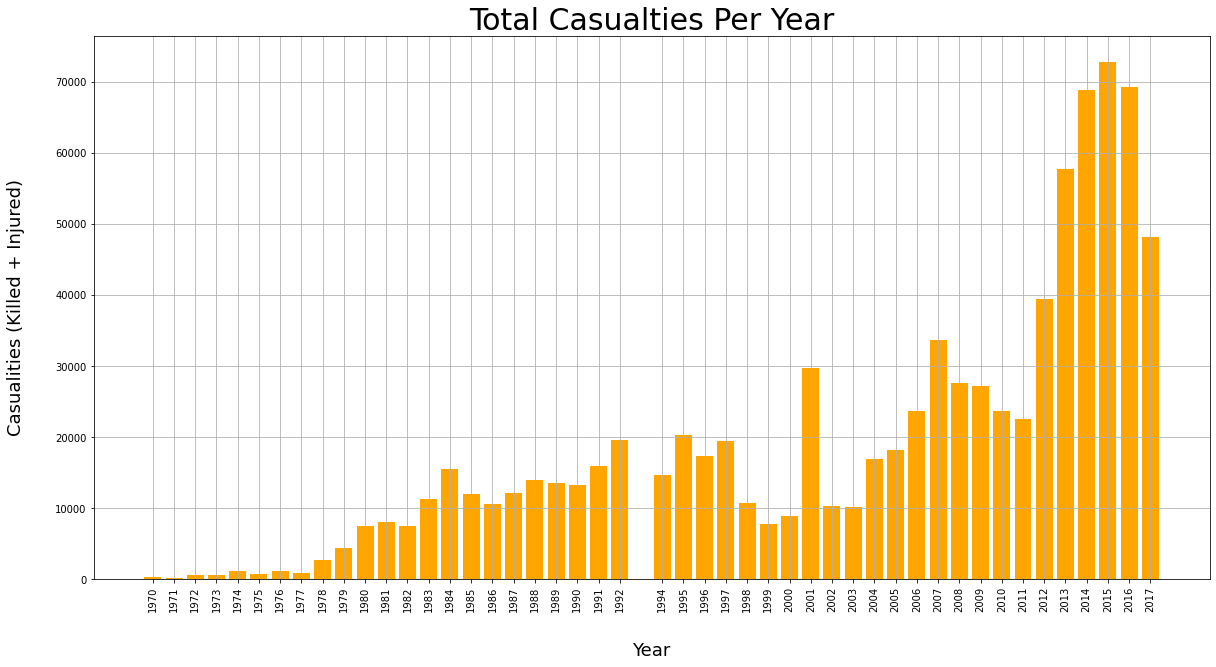

In [42]:
plt.figure(figsize = (20,10))
plt.bar(Cas_Year['Year'], Cas_Year['Total_casualities'], tick_label = Cas_Year['Year'], color =  'orange')
plt.xticks(rotation  = 90)
plt.title('Total Casualties Per Year', fontsize=30)  
plt.grid(True)
plt.xlabel('Year', fontsize = 18, labelpad = 30)
plt.ylabel('Casualities (Killed + Injured)', fontsize = 18, labelpad = 30)
plt.show()

#outcome:

Here usually, as the Time proceeds the Number of People Harmed (Killed or Injured) also Increased Significantly.
The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.
Though there has been a decline in the Number of People Harmed after 2016 but these numbers are still very large and need to be reduced as soon as possible

#Countries affected by Terrorist Attacks

In [44]:
country = df['Country'].value_counts().index.tolist()
print("Number of Countries affected by Terrorist Attacks :", len(country))

Number of Countries affected by Terrorist Attacks : 205


Now we will see, Top 30 Countries that are affected by Terrorist Attacks

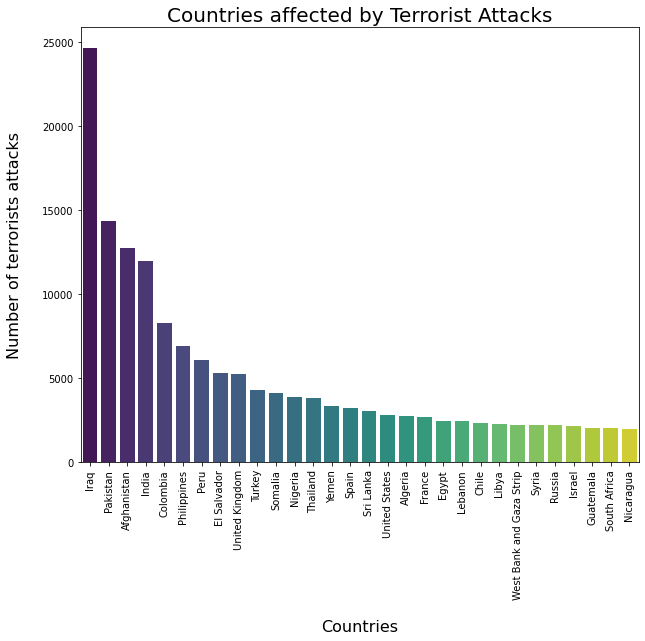

In [45]:
fig = plt.figure(figsize=(10,8))
sns.barplot(df['Country'].value_counts()[0:30].index, df['Country'].value_counts()[0:30].values,palette='viridis',  tick_label = country[0:30])
plt.xticks(rotation = 90)
plt.title('Countries affected by Terrorist Attacks', fontsize =  20)
plt.xlabel('Countries', fontsize = 16, labelpad = 20)
plt.ylabel('Number of terrorists attacks', fontsize = 16, labelpad = 20)
plt.show()

#outcome:

The above image shows the Top 30 countries in terms of most number of terrorist attacks.
The top country which is most affected by terrorist attacks is Iraq.
The top 5 countries most affected by terrorist attacks are Iraq, Pakistan, Afganistan, India, and Colombia.

#Number of Total Casualities in Each Country

In [46]:
count_cas = df.groupby('Country').Total_casualities.sum().to_frame().reset_index().sort_values('Total_casualities', ascending=False)
count_cas.head(30)

,Country,Total_casualities
84,Iraq,202982.0
0,Afghanistan,80213.0
134,Pakistan,64427.0
80,India,47108.0
167,Sri Lanka,29792.0
189,United States,24469.0
35,Colombia,23767.0
140,Philippines,22361.0
130,Nigeria,21728.0
175,Syria,21614.0


Now we will see, Top 30 Countries in terms of Causalities

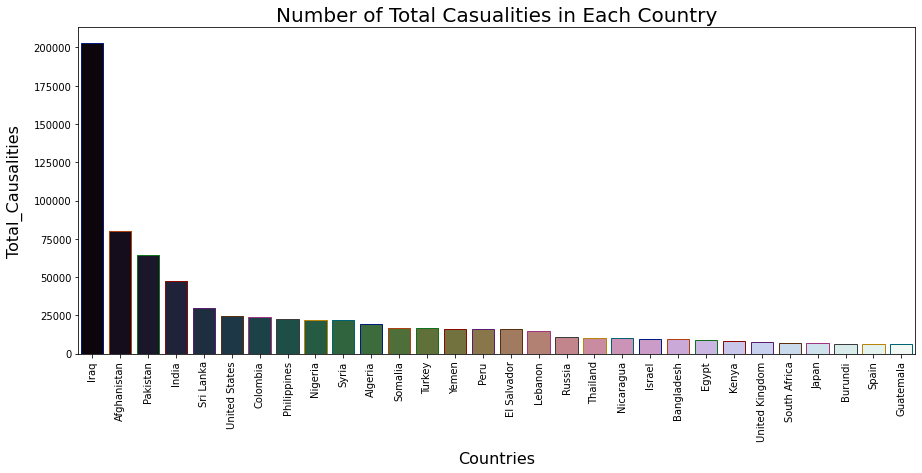

In [47]:
plt.subplots(figsize=(15,6))
sns.barplot(x=count_cas.Country[0:30], y=count_cas.Total_casualities[0:30], palette= 'cubehelix',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each Country', fontsize  = 20)
plt.xlabel("Countries", fontsize = 16, labelpad = 10)
plt.ylabel("Total_Causalities", fontsize = 16, labelpad = 10)
plt.show()

#outcome:

The above image shows the Most Number of Total Casualities in Each Country.
The most affected country by Total Casualities is Iraq with 200K+ Casualities.
The top 5 countries most affected by terrorist attacks are Iraq, Afganistan, Pakistan, India, Sri Lanka.

#Most Affected States by Terrorist Attacks

In [48]:
state_aff = df['State'].value_counts()
print("Number of States affected by Terrorist Attacks :", len(state_aff))

Number of States affected by Terrorist Attacks : 2855


Now we will see, Top 30 states affected by the Terrorist Attacks.

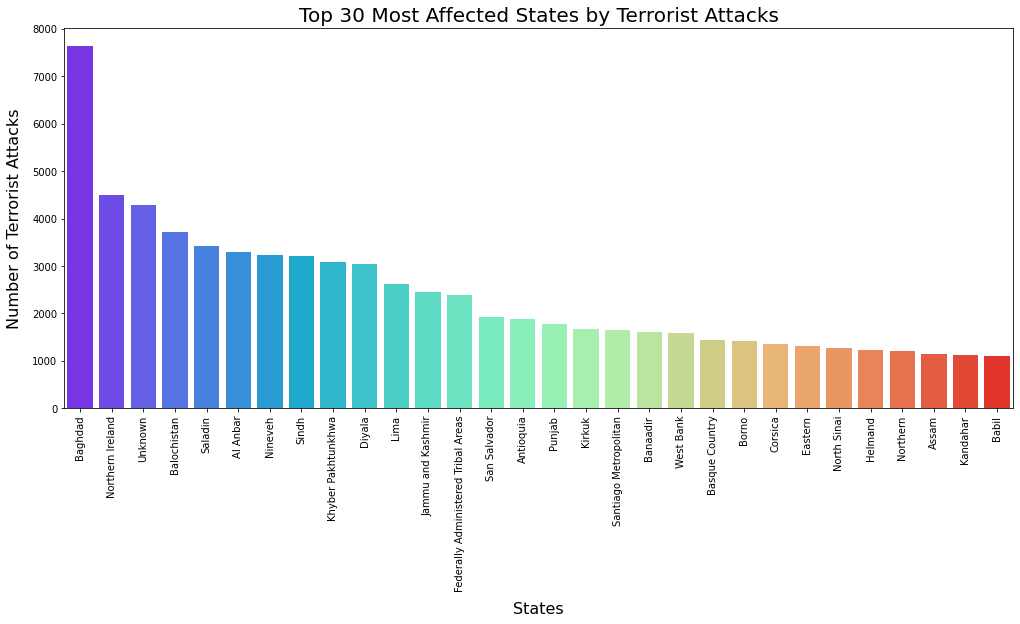

In [49]:
fig = plt.figure(figsize=(17,7))
sns.barplot(state_aff[0:30].index, state_aff[0:30].values, palette='rainbow')
plt.title('Top 30 Most Affected States by Terrorist Attacks', fontsize =  20)
plt.xlabel('States', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

#outcome:

The above image shows the Top 30 states in terms of most number of terrorist attacks.
The most affected state by terrorist attacks is Baghdadm with 7500+ Terrorist Attacks.
The top 5 states most affected by terrorist attacks are Baghdadm, Northern Ireland, Balochistan, Saladin, Al Anbar.


#Most Affected Regions by Terrorist Attacks

In [50]:
region_aff = df['Region'].value_counts()
print("Number of Regions affected by the Terrorist Attacks :", len(region_aff))

Number of Regions affected by the Terrorist Attacks : 12


Now we will see, Top 30 Regions affected by the Terrorist Attacks

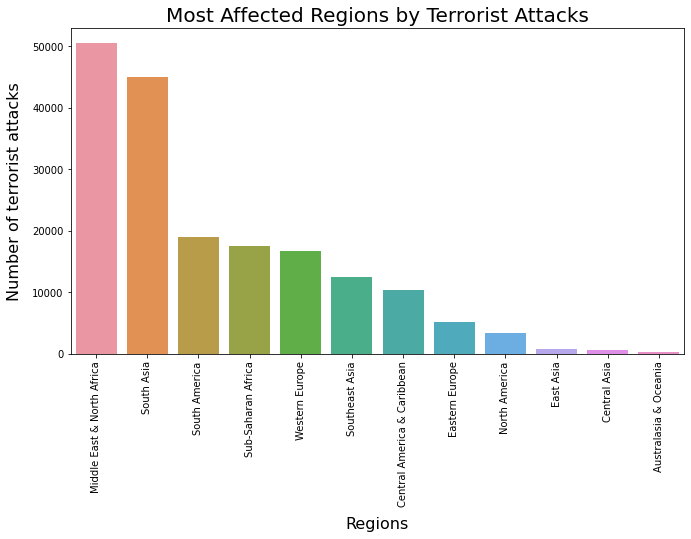

In [51]:
fig = plt.figure(figsize=(11,6))
sns.barplot(region_aff.index, region_aff.values, tick_label = region_aff.index)
plt.title('Most Affected Regions by Terrorist Attacks', fontsize =20)
plt.xlabel('Regions', fontsize = 16, labelpad = 10)
plt.ylabel('Number of terrorist attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

#outcome:

The above image shows the top regions in terms of most number of terrorist attacks.
The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.
The top 5 regions most affected by terrorist attacks are Middle East & North Africa, South Asia, South America, Sub-Saharan Africa, Western Europe.


#Number of Terrorist Attacks v/s Terrorist Groups

In [52]:
terror_grps = df['Group'].value_counts()
print("Number of Terrorist groups that attacks :", len(terror_grps))

Number of Terrorist groups that attacks : 3537


Now we will see, Top 10 Terrorist groups with most number of Attacks

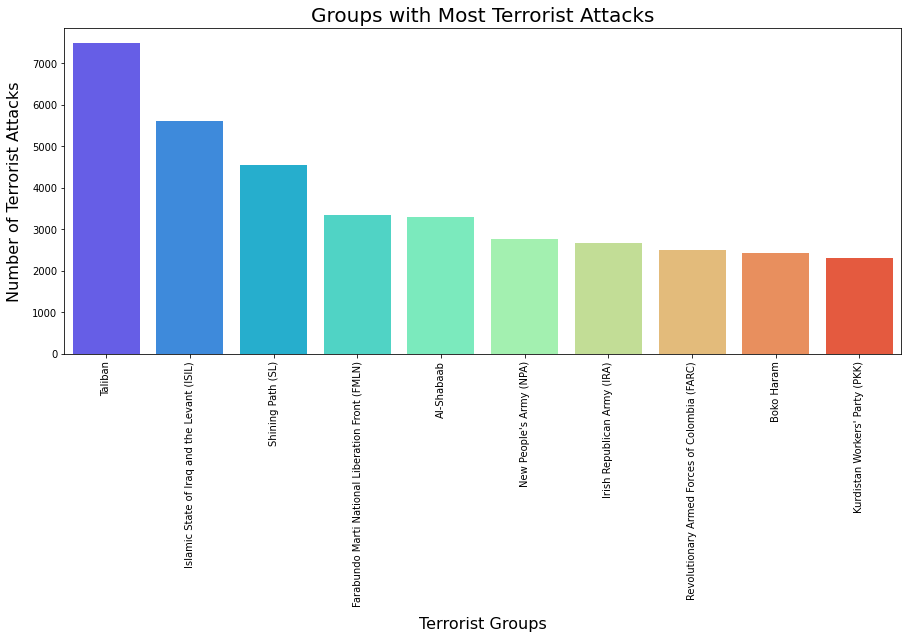

In [53]:
fig = plt.figure(figsize=(15,6))
sns.barplot(terror_grps[1:11].index, terror_grps[1:11].values, palette='rainbow')
plt.title('Groups with Most Terrorist Attacks', fontsize  = 20)
plt.xlabel('Terrorist Groups', fontsize = 16, labelpad = 10)
plt.ylabel('Number of Terrorist Attacks', fontsize = 16, labelpad = 10)
plt.xticks(rotation=90)
plt.show()

#outcome:

The above image shows the top Groups with Most No. of Terrorist Attacks.
The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.
The top 5 Groups with Most No. of Terrorist Attacks are 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab'.


#Types of Attacks executed by Terrorists

In [54]:
attack_types = df['AttackType'].value_counts()
print("Number of types of attacks executed by Terrorists :", len(attack_types))

Number of types of attacks executed by Terrorists : 9


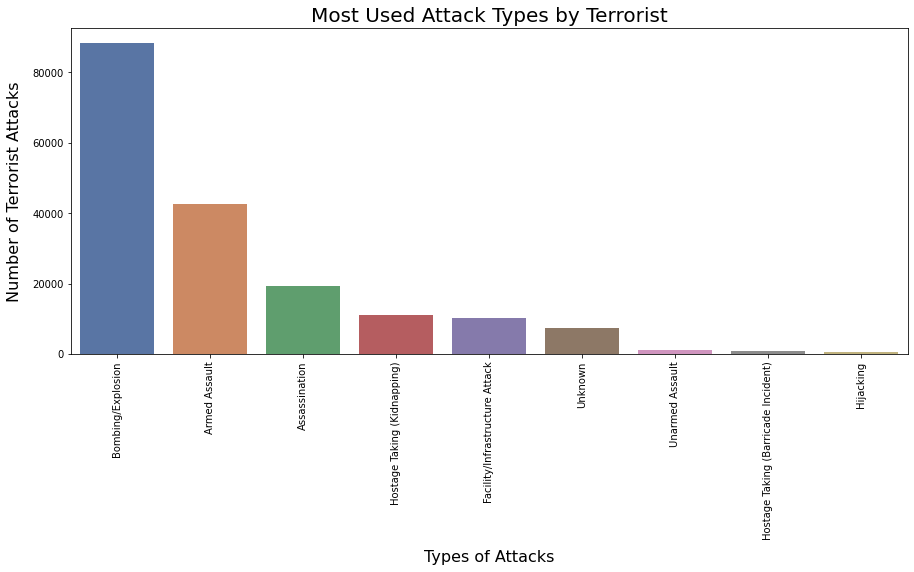

In [55]:
fig = plt.figure(figsize=(15,6))
sns.barplot(attack_types.index, attack_types.values, palette='deep')
plt.xticks(rotation=90)
plt.title("Most Used Attack Types by Terrorist", fontsize  = 20)
plt.xlabel("Types of Attacks", fontsize = 16, labelpad = 10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

#outcome:

The above image shows the Most Used Attack Types by Terrorists.
The Most Used Attack Type by Terrorists is Bombing/Explosion.
The top 5 Attack Types used by Terrorists are Bombing/Explosion, Armed Assault, Assassination, Hostage Taking (Kidnapping), Facility/Infrastructure Attack.


#Most frequent targets of terrorists

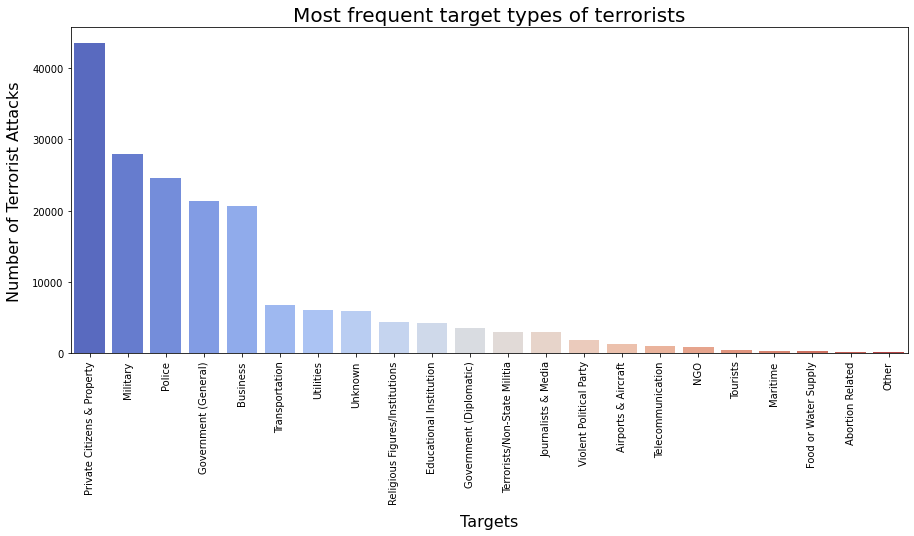

In [56]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Target_type', data=df, order = df['Target_type'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Most frequent target types of terrorists", fontsize =  20)
plt.xlabel("Targets", fontsize = 16, labelpad =  10)
plt.ylabel("Number of Terrorist Attacks", fontsize = 16, labelpad = 10)
plt.show()

#outcome:

The above image shows the Most frequent target types of terrorists.
The Most frequent target type of terrorists is Private Citizens & Property.
The top 5 Most frequent target type of terrorists are 'Private Citizens & Property', 'Military', 'Police', 'Government (General)', 'Business'.


#Final Outcomes

1.The most affected region by terrorist attacks is Middle East and North Africa with 50K+ Terrorist Attacks.

2.The peak in terms of Number of Terrorists Attacks was observed in 2014.

3.The country which is most affected by terrorist attacks is Iraq.

4.The peak in terms of Number of People Harmed was observed in 2015 with 70K+ casualties.

5.The most affected Country by Total Casualities is Iraq with 200K+ Casualities.

6.The most affected State by Terrorist Attacks is Baghdadm with 7500+ Terrorist Attacks.

7.The Terrorist Group with Most No. of Terrorist Attacks is Taliban with 7K+ Terrorist Attacks.

8.The Most Used Attack Type by Terrorists is Bombing.

9.The Most frequent target type of terrorists is Private Citizens & Property